In [12]:
import scipy.io as spio
import matplotlib.pyplot as plt
import sys
import warnings
import math
import imageio
import PIL
import random
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn import svm
from math import log
import numpy as np
np.seterr(divide='ignore')
import scipy

In [13]:
image1 = imageio.imread('plane.jpg')
image2 = imageio.imread('bird.jpg')


In [14]:
image1_cube = []
image2_cube = []
for idy in range(len(image1)):
    for idx in range(len(image1[0])):
        y = [idy, idx] + (list(image1[idy, idx]))
        image1_cube.append(y) 
image1_cube = normalize(np.array(image1_cube), norm='max', axis=0)

for idy in range(len(image2)):
    for idx in range(len(image2[0])):
        y = [idy, idx] + (list(image2[idy, idx]))
        image2_cube.append(y) 
image2_cube = normalize(np.array(image2_cube), norm='max', axis=0)


In [21]:
g = GaussianMixture(n_components = 2)
model = g.fit(image1_cube)
y_pred = model.predict(image1_cube)

print(len(y_pred))
print(len(y_pred[y_pred>0]))
print(y_pred[:10])
print(y_pred.shape)

154401
19531
[0 0 0 0 0 0 0 0 0 0]
(154401,)


(321, 481, 3)


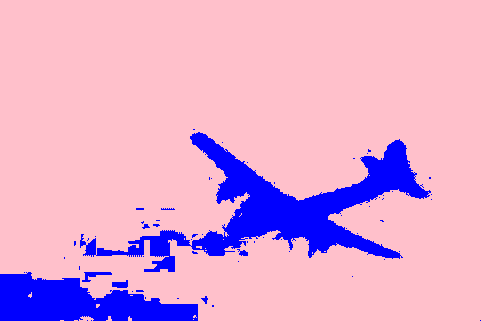

In [22]:
pink = [255,192,203]
blue = [0, 0, 255]
new_img = []
for i in y_pred:
    if i == 0:
        new_img.append(pink)
    else:
        new_img.append(blue)

new_img = np.array([new_img])
new_img = new_img.reshape(image1.shape)
print(new_img.shape)
PIL.Image.fromarray(new_img.astype(np.uint8))


In [17]:
def tenFoldCrossVal(data):
    
    
    #Attach labels to data
    X = data

    #Split the data in 10 batches
    sizeBatches = 10
    kf = KFold(n_splits=sizeBatches, shuffle=True)
    
    components = dict(n_components=np.arange(1, 10))
    #param_grid = dict(gamma=gamma_range, C=C_range)
    grid = GridSearchCV(GaussianMixture(), param_grid=components, \
                        cv=kf, return_train_score=True)
    grid.fit(X)

    print("The best parameters are %s with a score of %0.2f"
          % (grid.best_params_, grid.best_score_))
    #print(grid.cv_results_)
    
    return grid.best_estimator_

In [18]:
def fitAndTest(p_param, data):
    
    #Attach labels to data
    X = data
    
    colors = {}
    for i in range(p_param):
        r = random.randint(0,255)
        g = random.randint(0,255)
        b = random.randint(0,255)
        colors[i] = [r, g, b]
    
    g = GaussianMixture(n_components=p_param)
    model = g.fit(X)
    y_pred = model.predict(X)
    
    print(y_pred[:10])
    new_img2 = []
    for i in y_pred:
        new_img2.append(colors[i])
        
    print(new_img2[:10])
    new_img2 = np.array([new_img2])
    new_img2 = new_img2.reshape((321, 481, 3))
    img = PIL.Image.fromarray(new_img2.astype(np.uint8))
    img.save('GMM_bird.jpg')

In [19]:
p_hat = tenFoldCrossVal(image2_cube)

The best parameters are {'n_components': 9} with a score of 8.32


In [20]:
#fitAndTest(p_hat, d4train1000_data.T, d4train1000_labels)
fitAndTest(19, image2_cube)

[17 17 17 17 17 17 17 17 17 17]
[[184, 234, 57], [184, 234, 57], [184, 234, 57], [184, 234, 57], [184, 234, 57], [184, 234, 57], [184, 234, 57], [184, 234, 57], [184, 234, 57], [184, 234, 57]]
